# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "drive/My Drive/Colab Notebooks/Google Play Store/"

/content/drive/My Drive/Colab Notebooks/Google Play Store


<h1>1. Importing libraries</h1>

In [58]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns

<h1>2. Loading of data</h1>

In [77]:
df = pd.read_csv('data/google-play-store.csv', encoding='utf-8')

In [78]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<h1>3. Data Cleaning</h1>

In [79]:
# Check null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [81]:
# Detect outliers
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [83]:
# Remove outliers
df.drop([10472], inplace=True)
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


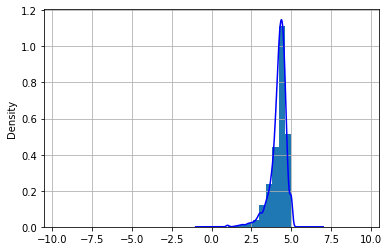

In [84]:
# Hist plot
xt=df['Rating'].hist(density=True, stacked=True)
df["Rating"].plot(kind='density', color='blue')

plt.grid()
plt.xlim(-10.5, 10.5)
plt.show()

In [85]:
rating_data=df[pd.notnull(df['Rating'])]

mean=np.mean(rating_data['Rating'])
median=np.median(rating_data['Rating'])
mode=sc.mode(rating_data['Rating'])

print(mean, median, mode)

4.191757420456978 4.3 ModeResult(mode=array([4.4]), count=array([1109]))


In [86]:
# Rating is skewed so take median in place of NaN
df['Rating'].fillna(value=median, inplace=True)

In [87]:
# Impute the categorical values
df["Type"].fillna(str(df["Type"].mode().values[0]),inplace=True)
df["Current Ver"].fillna(str(df["Current Ver"].mode().values[0]), inplace=True)
df["Android Ver"].fillna(str(df["Android Ver"].mode().values[0]),inplace=True)

In [88]:
# Check null values again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [89]:
# Remove dublicate values
(df.duplicated().value_counts()/df.shape[0]) * 100

False    95.54428
True      4.45572
dtype: float64

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<h1>3. Data Manipulation</h1>

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [93]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [94]:
df['Reviews'] = df['Reviews'].astype('int')

In [95]:
df['Size'].value_counts()

Varies with device    1526
11M                    188
12M                    186
13M                    186
14M                    182
                      ... 
853k                     1
874k                     1
951k                     1
812k                     1
67k                      1
Name: Size, Length: 461, dtype: int64

In [96]:
df['Size'] = df['Size'].str.replace('M', 'e+6').str.replace('k', 'e+3').str.replace('Varies with device','0').astype('float')

In [97]:
df['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [98]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype('int')

In [99]:
df['Type'].value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

In [100]:
df['Price'].value_counts()

0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$46.99        1
$394.99       1
$2.90         1
$25.99        1
$389.99       1
Name: Price, Length: 92, dtype: int64

In [101]:
df['Price'] = df['Price'].str.replace('$','').astype('float')

In [102]:
df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [103]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          588
Education                              527
Business                               427
Medical                                408
                                      ... 
Card;Brain Games                         1
Comics;Creativity                        1
Board;Pretend Play                       1
Music & Audio;Music & Video              1
Health & Fitness;Action & Adventure      1
Name: Genres, Length: 119, dtype: int64

In [104]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [105]:
df['Current Ver'].value_counts()

Varies with device    1310
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
10.012                   1
2.5.5.9                  1
6.6.3106                 1
3.1.50                   1
acremotecontrol18        1
Name: Current Ver, Length: 2831, dtype: int64

In [106]:
df['Android Ver'].value_counts()

4.1 and up            2381
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  int64         
 4   Size            10357 non-null  float64       
 5   Installs        10357 non-null  int64         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [108]:
df.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


<h1>4. Data Visualization</h1>

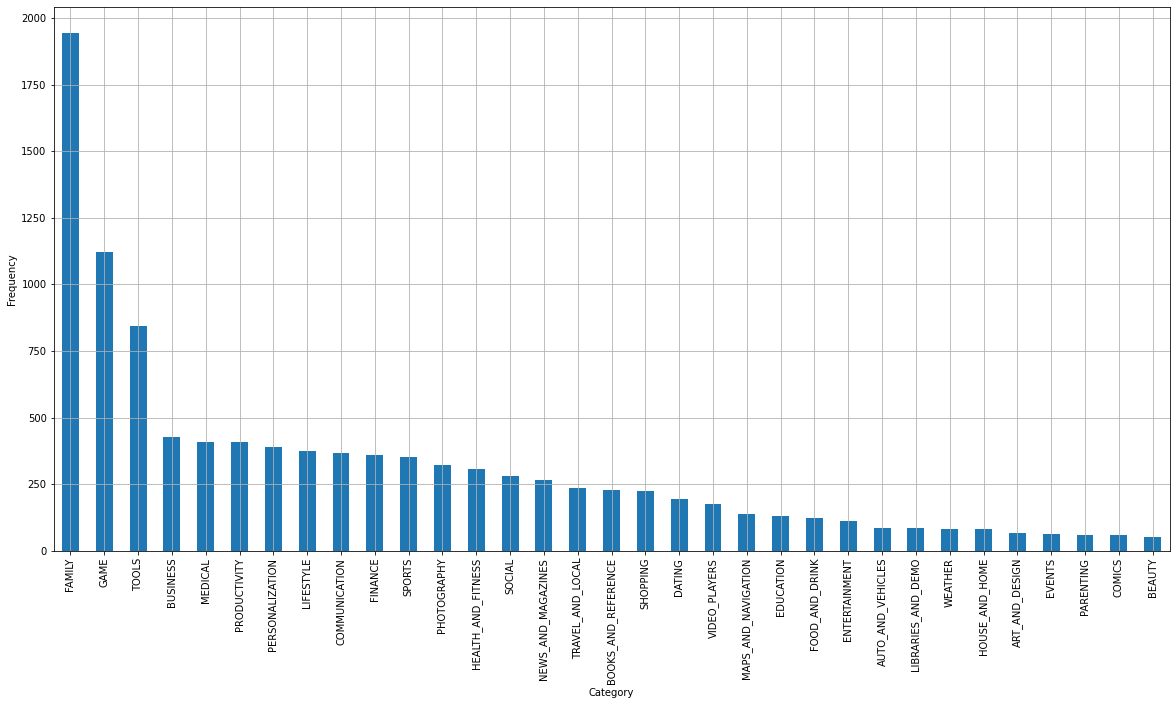

In [109]:
# Category
plt.figure(figsize=(20, 10))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.grid()
plt.show()

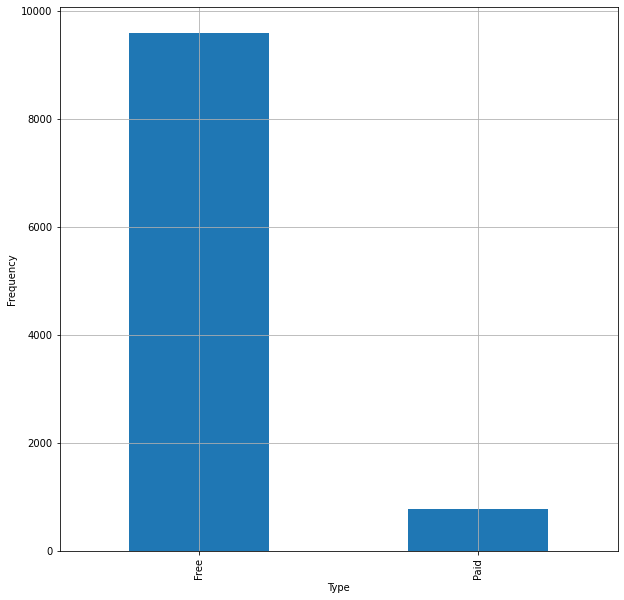

In [110]:
# Type
plt.figure(figsize=(10, 10))
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.grid()
plt.show()

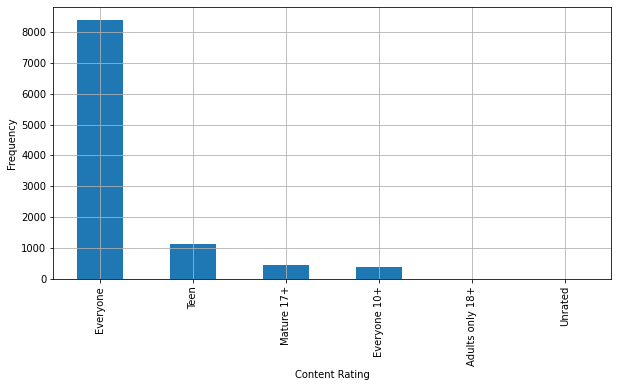

In [111]:
# Content Rating 
plt.figure(figsize=(10, 5))
df['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()

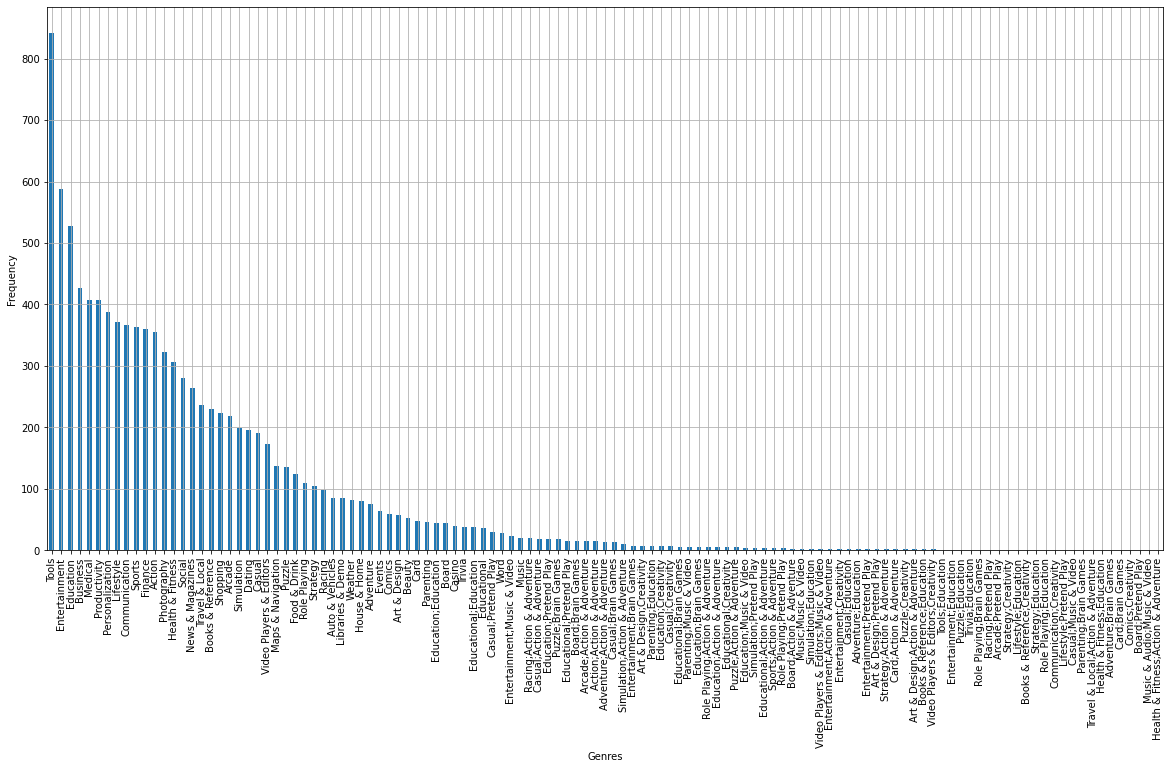

In [112]:
# Genres
plt.figure(figsize=(20, 10))
df['Genres'].value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.grid()
plt.show()

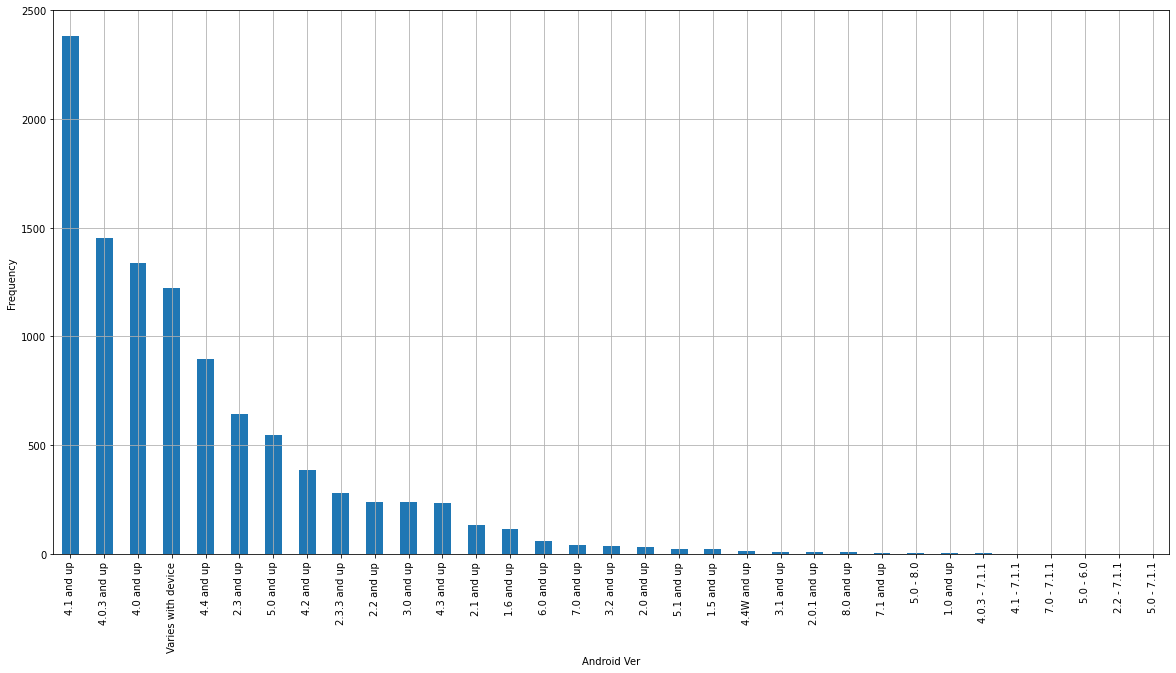

In [113]:
# Android Ver
plt.figure(figsize=(20, 10))
df['Android Ver'].value_counts().plot(kind='bar')
plt.xlabel('Android Ver')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Most reviewed apps in Google Play Store')

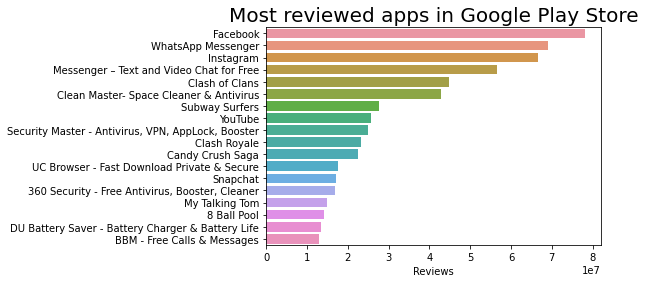

In [114]:
sorted_df_reviews = df.sort_values(['Reviews'], ascending=False)[:50]

ax = sns.barplot(x='Reviews', y='App', data=sorted_df_reviews)
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most reviewed apps in Google Play Store", size = 20)

Text(0.5, 1.0, 'Most installed apps in Google Play Store')

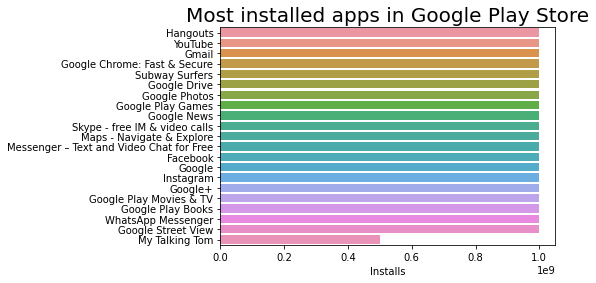

In [115]:
sorted_df_installs = df.sort_values(['Installs'], ascending=False)[:50]

ax = sns.barplot(x='Installs', y='App', data=sorted_df_installs)
ax.set_xlabel('Installs')
ax.set_ylabel('')
ax.set_title("Most installed apps in Google Play Store", size = 20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


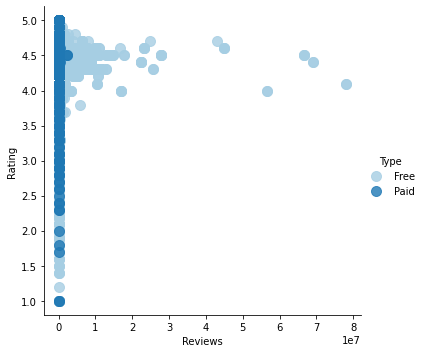

In [117]:
# All paid apps have a better rating in the content rating.
sns.lmplot("Reviews","Rating",data=df,hue="Type",fit_reg=False,palette="Paired",scatter_kws={"marker":"D","s":100})
plt.show()